In [ ]:
# importing all necessary libraries

import pandas as pd
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dense, Activation, Dropout, LSTM, Bidirectional,SimpleRNN,GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM, Dropout
from keras.callbacks import LambdaCallback
from keras.layers import TimeDistributed
from keras.optimizers import RMSprop
from keras.utils import plot_model


In [ ]:
def get_set(i,len_vocab):
    tmp = np.zeros(len_vocab);
    tmp[i] = 1
    return list(tmp)

# one hot encoding the names

def one_hot_names(X,max_len,char_index,len_vocab):
    new_list = []
    name_tru = [str(i)[0:max_len] for i in X]

    for i in name_tru:
        tmp = [get_set(char_index[j],len_vocab) for j in str(i)]
        for k in range(0,max_len - len(str(i))):
            tmp.append(get_set(char_index["\n"],len_vocab))
        new_list.append(tmp)

    return new_list

# one hot encoding the output
def one_hot_y(y):
    new_list = []
    for i in y:
        if i == 'M':
            new_list.append([1,0])
        else:
            new_list.append([0,1])

    return new_list

# Preprocessing the data using the onehot names
def preprocessing(data):
    lables  = 2
    names = df['name'].apply(lambda x:x.lower())
    gender = df['gender']
    max_len = max([len(i) for i in names])
    vocab = set(' '.join([str(i) for i in names]))
    vocab.add('\n')
    len_vocab = len(vocab)
    char_index = dict((c, i) for i, c in enumerate(vocab))
    X = one_hot_names(names.values,max_len,char_index,len_vocab)
    y = one_hot_y(gender)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, shuffle=True)
    return X_train, X_test, y_train, y_test,len_vocab,max_len

# Defining the lstm model
def model_lstm(X_train, X_test, y_train, y_test,len_vocab,max_len):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(max_len,len_vocab)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activity_regularizer=l2(0.002)))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    result = model.fit(X_train, y_train, epochs=8, verbose=1, validation_data =(X_test, y_test))
    plt.figure(figsize=(12,8))
    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
# Defining the simple rnn model   
def model_rnn(X_train, X_test, y_train, y_test,len_vocab,max_len):
    model = Sequential()
    model.add(SimpleRNN(50, activation='relu', input_shape=(max_len,len_vocab)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activity_regularizer=l2(0.002)))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    result = model.fit(X_train, y_train, epochs=8, verbose=1, validation_data =(X_test, y_test))
    plt.figure(figsize=(12,8))
    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
# Defining the GRU model    
def model_gru(X_train, X_test, y_train, y_test,len_vocab,max_len):
    model = Sequential()
    model.add(GRU(50, activation='relu', input_shape=(max_len,len_vocab)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activity_regularizer=l2(0.002)))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    result = model.fit(X_train, y_train, epochs=8, verbose=1, validation_data =(X_test, y_test))
    plt.figure(figsize=(12,8))
    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    

In [ ]:
df = pd.read_csv("C:/Users/akhil/Downloads/name_gender.csv")

In [ ]:
# Divding the data into 25,50, 75 % partitions
df_25 = df.sample(frac = 0.25)
df_50 = df.sample(frac = 0.5)
df_75 = df.sample(frac = 0.75)

Epoch 1/8
2376/2376 [==============================] - 48s 19ms/step - loss: 0.4174 - accuracy: 0.8146 - val_loss: 0.3595 - val_accuracy: 0.8464
Epoch 2/8
2376/2376 [==============================] - 14s 6ms/step - loss: 0.3582 - accuracy: 0.8491 - val_loss: 0.3436 - val_accuracy: 0.8538
Epoch 3/8
2376/2376 [==============================] - 15s 6ms/step - loss: 0.3420 - accuracy: 0.8590 - val_loss: 0.3286 - val_accuracy: 0.8587
Epoch 4/8
2376/2376 [==============================] - 13s 6ms/step - loss: 0.3269 - accuracy: 0.8653 - val_loss: 0.3191 - val_accuracy: 0.8646
Epoch 5/8
2376/2376 [==============================] - 17s 7ms/step - loss: 0.3148 - accuracy: 0.8707 - val_loss: 0.3062 - val_accuracy: 0.8721
Epoch 6/8
2376/2376 [==============================] - 16s 7ms/step - loss: 0.3045 - accuracy: 0.8781 - val_loss: 0.3225 - val_accuracy: 0.8641
Epoch 7/8
2376/2376 [==============================] - 16s 7ms/step - loss: 0.2964 - accuracy: 0.8822 - val_loss: 0.2964 - val_accuracy

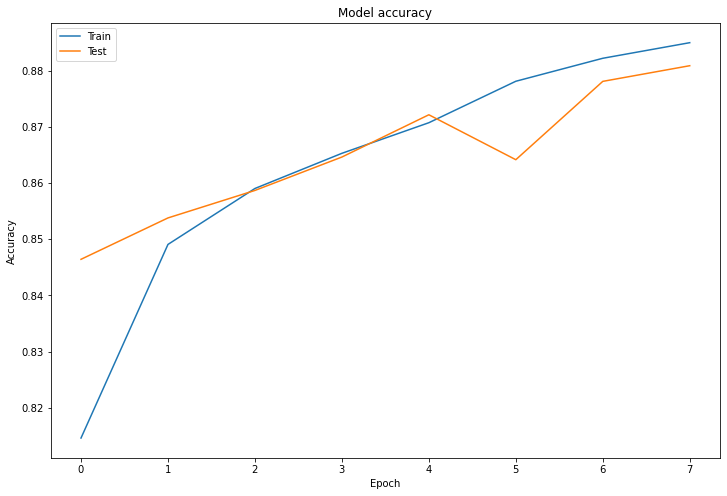

In [ ]:
# Training lstm with 25% data
X_train, X_test, y_train, y_test,len_vocab,max_len = preprocessing(df_25)
model_lstm(X_train, X_test, y_train, y_test,len_vocab,max_len)

Epoch 1/8
2376/2376 [==============================] - 76s 31ms/step - loss: 0.4168 - accuracy: 0.8143 - val_loss: 0.3627 - val_accuracy: 0.8440
Epoch 2/8
2376/2376 [==============================] - 22s 9ms/step - loss: 0.3624 - accuracy: 0.8475 - val_loss: 0.3520 - val_accuracy: 0.8512
Epoch 3/8
2376/2376 [==============================] - 21s 9ms/step - loss: 0.3470 - accuracy: 0.8548 - val_loss: 0.3351 - val_accuracy: 0.8583
Epoch 4/8
2376/2376 [==============================] - 19s 8ms/step - loss: 0.3321 - accuracy: 0.8621 - val_loss: 0.3257 - val_accuracy: 0.8612
Epoch 5/8
2376/2376 [==============================] - 21s 9ms/step - loss: 0.3192 - accuracy: 0.8685 - val_loss: 0.3122 - val_accuracy: 0.8686
Epoch 6/8
2376/2376 [==============================] - 16s 7ms/step - loss: 0.3085 - accuracy: 0.8741 - val_loss: 0.3197 - val_accuracy: 0.8681
Epoch 7/8
2376/2376 [==============================] - 14s 6ms/step - loss: 0.2991 - accuracy: 0.8789 - val_loss: 0.3019 - val_accuracy

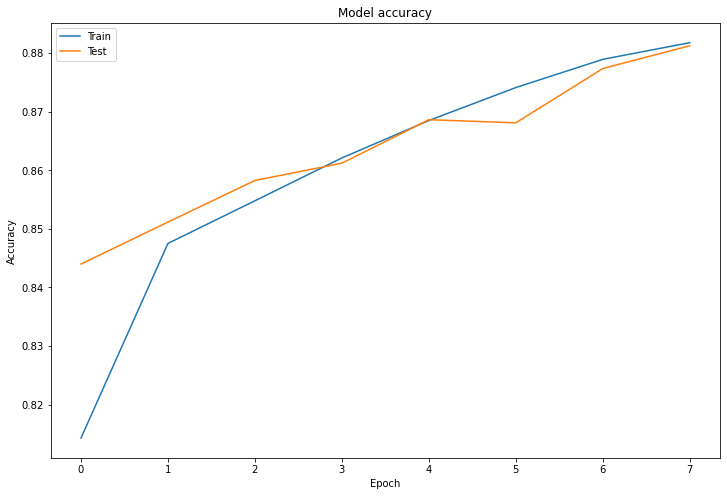

In [ ]:
# Training lstm with 50%data
X_train, X_test, y_train, y_test,len_vocab,max_len = preprocessing(df_50)
model_lstm(X_train, X_test, y_train, y_test,len_vocab,max_len)

Epoch 1/8
2376/2376 [==============================] - 35s 15ms/step - loss: 0.4185 - accuracy: 0.8100 - val_loss: 0.3599 - val_accuracy: 0.8450
Epoch 2/8
2376/2376 [==============================] - 13s 6ms/step - loss: 0.3520 - accuracy: 0.8527 - val_loss: 0.3360 - val_accuracy: 0.8550
Epoch 3/8
2376/2376 [==============================] - 15s 6ms/step - loss: 0.3350 - accuracy: 0.8605 - val_loss: 0.3287 - val_accuracy: 0.8628
Epoch 4/8
2376/2376 [==============================] - 15s 6ms/step - loss: 0.3230 - accuracy: 0.8670 - val_loss: 0.3136 - val_accuracy: 0.8700
Epoch 5/8
2376/2376 [==============================] - 15s 6ms/step - loss: 0.3126 - accuracy: 0.8730 - val_loss: 0.3079 - val_accuracy: 0.8726
Epoch 6/8
2376/2376 [==============================] - 14s 6ms/step - loss: 0.3049 - accuracy: 0.8771 - val_loss: 0.3026 - val_accuracy: 0.8770
Epoch 7/8
2376/2376 [==============================] - 14s 6ms/step - loss: 0.2975 - accuracy: 0.8801 - val_loss: 0.3004 - val_accuracy

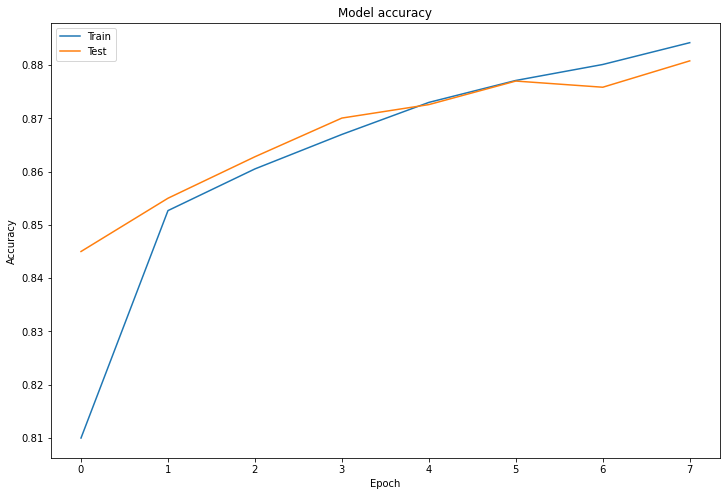

In [ ]:
# Training lstm with 75% data
X_train, X_test, y_train, y_test,len_vocab,max_len = preprocessing(df_75)
model_lstm(X_train, X_test, y_train, y_test,len_vocab,max_len)

Epoch 1/8
2376/2376 [==============================] - 313s 131ms/step - loss: 0.4200 - accuracy: 0.8095 - val_loss: 0.3758 - val_accuracy: 0.8368
Epoch 2/8
2376/2376 [==============================] - 13s 5ms/step - loss: 0.3564 - accuracy: 0.8503 - val_loss: 0.3464 - val_accuracy: 0.8486
Epoch 3/8
2376/2376 [==============================] - 12s 5ms/step - loss: 0.3364 - accuracy: 0.8599 - val_loss: 0.3385 - val_accuracy: 0.8558
Epoch 4/8
2376/2376 [==============================] - 13s 6ms/step - loss: 0.3236 - accuracy: 0.8660 - val_loss: 0.3718 - val_accuracy: 0.8381
Epoch 5/8
2376/2376 [==============================] - 14s 6ms/step - loss: 0.3111 - accuracy: 0.8734 - val_loss: 0.3144 - val_accuracy: 0.8676
Epoch 6/8
2376/2376 [==============================] - 12s 5ms/step - loss: 0.3026 - accuracy: 0.8775 - val_loss: 0.3042 - val_accuracy: 0.8723
Epoch 7/8
2376/2376 [==============================] - 13s 5ms/step - loss: 0.2939 - accuracy: 0.8823 - val_loss: 0.3054 - val_accura

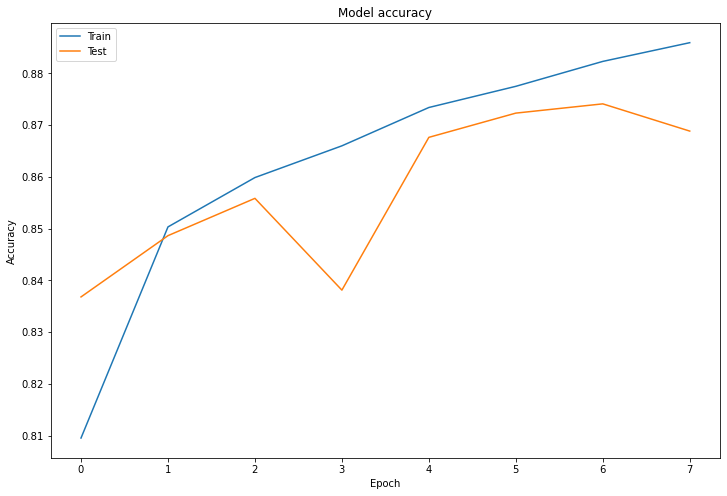

In [ ]:
# Training lstm with total data
X_train, X_test, y_train, y_test,len_vocab,max_len = preprocessing(df)
model_lstm(X_train, X_test, y_train, y_test,len_vocab,max_len)

Epoch 1/8
2376/2376 [==============================] - 33s 14ms/step - loss: 0.4024 - accuracy: 0.8243 - val_loss: 0.3587 - val_accuracy: 0.8529
Epoch 2/8
2376/2376 [==============================] - 9s 4ms/step - loss: 0.3453 - accuracy: 0.8603 - val_loss: 0.3345 - val_accuracy: 0.8635
Epoch 3/8
2376/2376 [==============================] - 9s 4ms/step - loss: 0.3266 - accuracy: 0.8702 - val_loss: 0.3226 - val_accuracy: 0.8703
Epoch 4/8
2376/2376 [==============================] - 11s 5ms/step - loss: 0.3164 - accuracy: 0.8741 - val_loss: 0.3127 - val_accuracy: 0.8768
Epoch 5/8
2376/2376 [==============================] - 10s 4ms/step - loss: 0.3072 - accuracy: 0.8788 - val_loss: 0.3181 - val_accuracy: 0.8754
Epoch 6/8
2376/2376 [==============================] - 10s 4ms/step - loss: 0.3029 - accuracy: 0.8821 - val_loss: 0.3209 - val_accuracy: 0.8730
Epoch 7/8
2376/2376 [==============================] - 9s 4ms/step - loss: 0.2970 - accuracy: 0.8846 - val_loss: 0.3079 - val_accuracy: 0

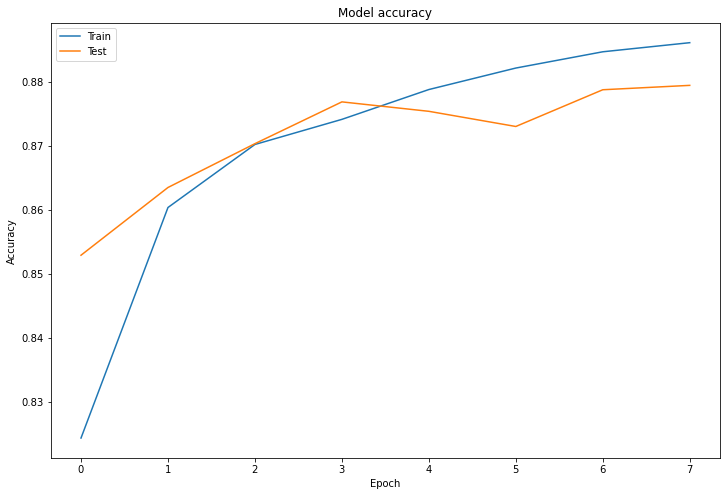

In [ ]:
# Training simple rnn with 25% data
X_train, X_test, y_train, y_test,len_vocab,max_len = preprocessing(df_25)
model_rnn(X_train, X_test, y_train, y_test,len_vocab,max_len)

Epoch 1/8
2376/2376 [==============================] - 32s 13ms/step - loss: 0.4040 - accuracy: 0.8249 - val_loss: 0.3526 - val_accuracy: 0.8535
Epoch 2/8
2376/2376 [==============================] - 10s 4ms/step - loss: 0.3505 - accuracy: 0.8576 - val_loss: 0.3365 - val_accuracy: 0.8619
Epoch 3/8
2376/2376 [==============================] - 7s 3ms/step - loss: 0.3307 - accuracy: 0.8660 - val_loss: 0.3198 - val_accuracy: 0.8710
Epoch 4/8
2376/2376 [==============================] - 8s 3ms/step - loss: 0.3189 - accuracy: 0.8739 - val_loss: 0.3432 - val_accuracy: 0.8610
Epoch 5/8
2376/2376 [==============================] - 7s 3ms/step - loss: 0.3105 - accuracy: 0.8771 - val_loss: 0.3139 - val_accuracy: 0.8723
Epoch 6/8
2376/2376 [==============================] - 8s 3ms/step - loss: 0.3043 - accuracy: 0.8802 - val_loss: 0.3063 - val_accuracy: 0.8783
Epoch 7/8
2376/2376 [==============================] - 9s 4ms/step - loss: 0.2983 - accuracy: 0.8828 - val_loss: 0.3154 - val_accuracy: 0.8

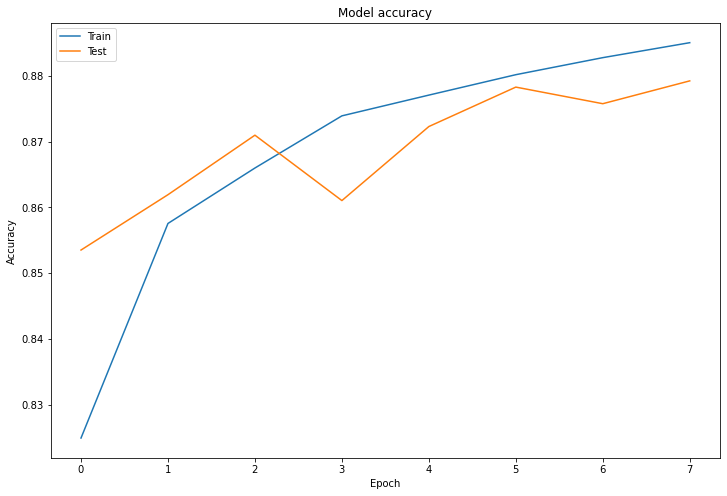

In [ ]:
# Training simple rnn with 50% data
X_train, X_test, y_train, y_test,len_vocab,max_len = preprocessing(df_50)
model_rnn(X_train, X_test, y_train, y_test,len_vocab,max_len)

Epoch 1/8
2376/2376 [==============================] - 34s 14ms/step - loss: 0.4032 - accuracy: 0.8249 - val_loss: 0.3938 - val_accuracy: 0.8325
Epoch 2/8
2376/2376 [==============================] - 11s 5ms/step - loss: 0.3506 - accuracy: 0.8583 - val_loss: 0.3303 - val_accuracy: 0.8642
Epoch 3/8
2376/2376 [==============================] - 10s 4ms/step - loss: 0.3316 - accuracy: 0.8675 - val_loss: 0.3440 - val_accuracy: 0.8587
Epoch 4/8
2376/2376 [==============================] - 9s 4ms/step - loss: 0.3196 - accuracy: 0.8742 - val_loss: 0.3217 - val_accuracy: 0.8707
Epoch 5/8
2376/2376 [==============================] - 11s 5ms/step - loss: 0.3105 - accuracy: 0.8779 - val_loss: 0.3203 - val_accuracy: 0.8688
Epoch 6/8
2376/2376 [==============================] - 12s 5ms/step - loss: 0.3041 - accuracy: 0.8802 - val_loss: 0.3048 - val_accuracy: 0.8773
Epoch 7/8
2376/2376 [==============================] - 11s 5ms/step - loss: 0.2965 - accuracy: 0.8834 - val_loss: 0.3058 - val_accuracy:

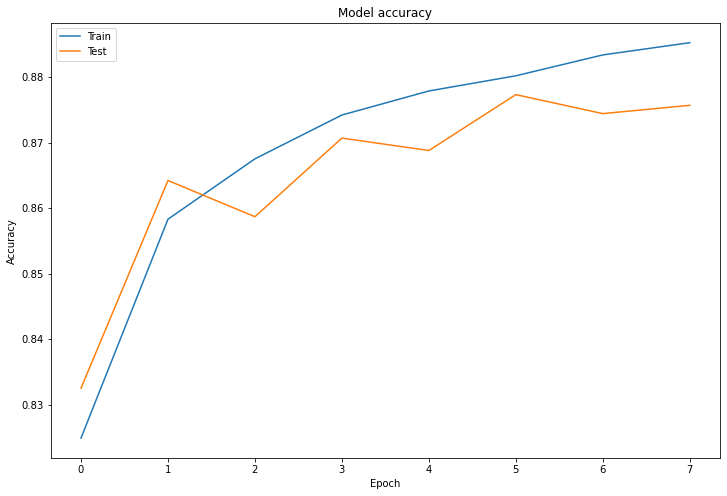

In [ ]:
# Training simple rnn with 75% data
X_train, X_test, y_train, y_test,len_vocab,max_len = preprocessing(df_75)
model_rnn(X_train, X_test, y_train, y_test,len_vocab,max_len)

Epoch 1/8
2376/2376 [==============================] - 41s 17ms/step - loss: 0.4028 - accuracy: 0.8250 - val_loss: 0.3533 - val_accuracy: 0.8545
Epoch 2/8
2376/2376 [==============================] - 8s 3ms/step - loss: 0.3472 - accuracy: 0.8586 - val_loss: 0.3292 - val_accuracy: 0.8682
Epoch 3/8
2376/2376 [==============================] - 8s 3ms/step - loss: 0.3273 - accuracy: 0.8697 - val_loss: 0.3177 - val_accuracy: 0.8731
Epoch 4/8
2376/2376 [==============================] - 9s 4ms/step - loss: 0.3154 - accuracy: 0.8743 - val_loss: 0.3131 - val_accuracy: 0.8750
Epoch 5/8
2376/2376 [==============================] - 11s 5ms/step - loss: 0.3076 - accuracy: 0.8795 - val_loss: 0.3051 - val_accuracy: 0.8773
Epoch 6/8
2376/2376 [==============================] - 11s 4ms/step - loss: 0.3005 - accuracy: 0.8814 - val_loss: 0.3199 - val_accuracy: 0.8699
Epoch 7/8
2376/2376 [==============================] - 8s 3ms/step - loss: 0.2943 - accuracy: 0.8852 - val_loss: 0.3021 - val_accuracy: 0.

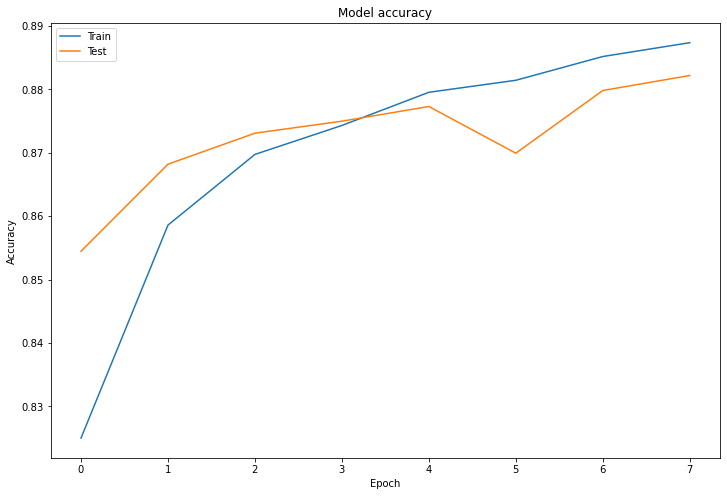

In [ ]:
# Training simple rnn with total data
X_train, X_test, y_train, y_test,len_vocab,max_len = preprocessing(df)
model_rnn(X_train, X_test, y_train, y_test,len_vocab,max_len)

Epoch 1/8
2376/2376 [==============================] - 42s 17ms/step - loss: 0.4131 - accuracy: 0.8135 - val_loss: 0.3578 - val_accuracy: 0.8480
Epoch 2/8
2376/2376 [==============================] - 16s 7ms/step - loss: 0.3572 - accuracy: 0.8490 - val_loss: 0.3464 - val_accuracy: 0.8524
Epoch 3/8
2376/2376 [==============================] - 15s 6ms/step - loss: 0.3392 - accuracy: 0.8584 - val_loss: 0.3307 - val_accuracy: 0.8615
Epoch 4/8
2376/2376 [==============================] - 17s 7ms/step - loss: 0.3255 - accuracy: 0.8649 - val_loss: 0.3210 - val_accuracy: 0.8651
Epoch 5/8
2376/2376 [==============================] - 15s 7ms/step - loss: 0.3138 - accuracy: 0.8703 - val_loss: 0.3115 - val_accuracy: 0.8681
Epoch 6/8
2376/2376 [==============================] - 16s 7ms/step - loss: 0.3040 - accuracy: 0.8752 - val_loss: 0.2996 - val_accuracy: 0.8775
Epoch 7/8
2376/2376 [==============================] - 15s 6ms/step - loss: 0.2961 - accuracy: 0.8793 - val_loss: 0.2968 - val_accuracy

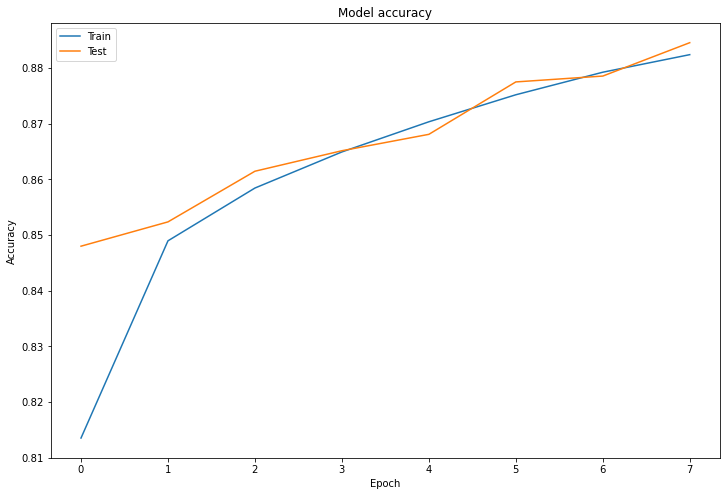

In [ ]:
# Training GRU Model with 25 % data
X_train, X_test, y_train, y_test,len_vocab,max_len = preprocessing(df_25)
model_gru(X_train, X_test, y_train, y_test,len_vocab,max_len)

Epoch 1/8
2376/2376 [==============================] - 39s 16ms/step - loss: 0.4092 - accuracy: 0.8171 - val_loss: 0.3618 - val_accuracy: 0.8440
Epoch 2/8
2376/2376 [==============================] - 21s 9ms/step - loss: 0.3562 - accuracy: 0.8514 - val_loss: 0.3442 - val_accuracy: 0.8562
Epoch 3/8
2376/2376 [==============================] - 23s 10ms/step - loss: 0.3377 - accuracy: 0.8605 - val_loss: 0.3343 - val_accuracy: 0.8613
Epoch 4/8
2376/2376 [==============================] - 20s 8ms/step - loss: 0.3242 - accuracy: 0.8665 - val_loss: 0.3216 - val_accuracy: 0.8675
Epoch 5/8
2376/2376 [==============================] - 22s 9ms/step - loss: 0.3119 - accuracy: 0.8733 - val_loss: 0.3091 - val_accuracy: 0.8707
Epoch 6/8
2376/2376 [==============================] - 20s 9ms/step - loss: 0.3026 - accuracy: 0.8778 - val_loss: 0.3109 - val_accuracy: 0.8724
Epoch 7/8
2376/2376 [==============================] - 22s 9ms/step - loss: 0.2952 - accuracy: 0.8811 - val_loss: 0.3012 - val_accurac

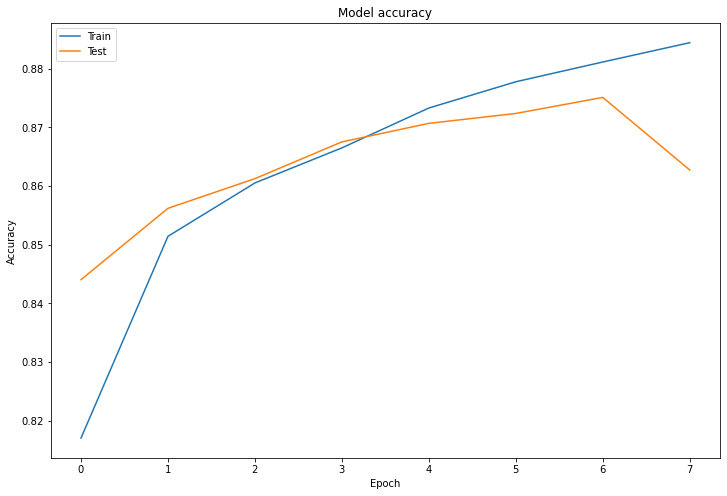

In [ ]:
# Training GRU Model with 50 % data
X_train, X_test, y_train, y_test,len_vocab,max_len = preprocessing(df_50)
model_gru(X_train, X_test, y_train, y_test,len_vocab,max_len)

Epoch 1/8
2376/2376 [==============================] - 43s 18ms/step - loss: 0.4129 - accuracy: 0.8155 - val_loss: 0.3712 - val_accuracy: 0.8452
Epoch 2/8
2376/2376 [==============================] - 22s 9ms/step - loss: 0.3557 - accuracy: 0.8516 - val_loss: 0.3398 - val_accuracy: 0.8583
Epoch 3/8
2376/2376 [==============================] - 22s 9ms/step - loss: 0.3405 - accuracy: 0.8584 - val_loss: 0.3321 - val_accuracy: 0.8614
Epoch 4/8
2376/2376 [==============================] - 21s 9ms/step - loss: 0.3275 - accuracy: 0.8652 - val_loss: 0.3187 - val_accuracy: 0.8667
Epoch 5/8
2376/2376 [==============================] - 20s 9ms/step - loss: 0.3166 - accuracy: 0.8706 - val_loss: 0.3140 - val_accuracy: 0.8697
Epoch 6/8
2376/2376 [==============================] - 21s 9ms/step - loss: 0.3068 - accuracy: 0.8756 - val_loss: 0.3047 - val_accuracy: 0.8733
Epoch 7/8
2376/2376 [==============================] - 23s 10ms/step - loss: 0.2984 - accuracy: 0.8793 - val_loss: 0.2963 - val_accurac

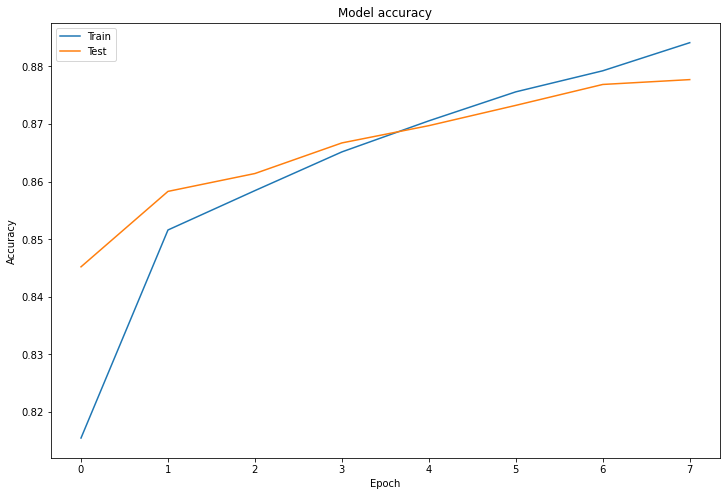

In [ ]:
# Training GRU Model with 75 % data
X_train, X_test, y_train, y_test,len_vocab,max_len = preprocessing(df_75)
model_gru(X_train, X_test, y_train, y_test,len_vocab,max_len)

Epoch 1/8
2376/2376 [==============================] - 42s 17ms/step - loss: 0.4099 - accuracy: 0.8168 - val_loss: 0.3650 - val_accuracy: 0.8465
Epoch 2/8
2376/2376 [==============================] - 16s 7ms/step - loss: 0.3567 - accuracy: 0.8505 - val_loss: 0.3465 - val_accuracy: 0.8525
Epoch 3/8
2376/2376 [==============================] - 17s 7ms/step - loss: 0.3391 - accuracy: 0.8600 - val_loss: 0.3342 - val_accuracy: 0.8593
Epoch 4/8
2376/2376 [==============================] - 17s 7ms/step - loss: 0.3269 - accuracy: 0.8645 - val_loss: 0.3215 - val_accuracy: 0.8663
Epoch 5/8
2376/2376 [==============================] - 17s 7ms/step - loss: 0.3153 - accuracy: 0.8706 - val_loss: 0.3174 - val_accuracy: 0.8704
Epoch 6/8
2376/2376 [==============================] - 18s 7ms/step - loss: 0.3058 - accuracy: 0.8757 - val_loss: 0.3044 - val_accuracy: 0.8749
Epoch 7/8
2376/2376 [==============================] - 17s 7ms/step - loss: 0.2971 - accuracy: 0.8802 - val_loss: 0.3087 - val_accuracy

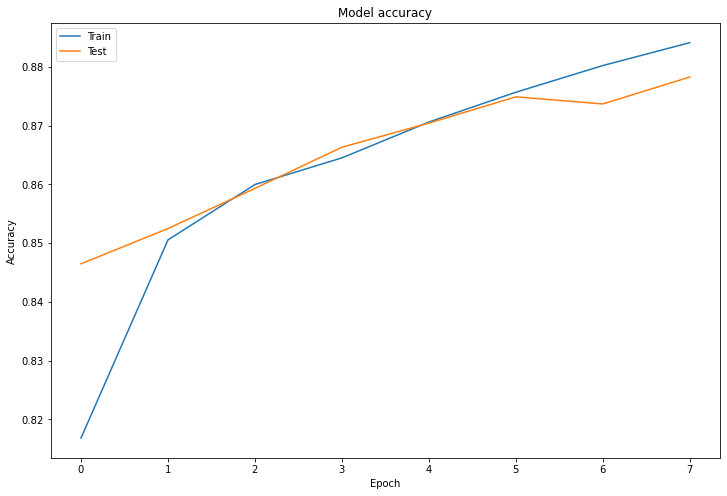

In [ ]:
# Training GRU Model with total data
X_train, X_test, y_train, y_test,len_vocab,max_len = preprocessing(df)
model_gru(X_train, X_test, y_train, y_test,len_vocab,max_len)

In [ ]:
df_M = df_25[df_25.gender == 'M']
df_F = df_25[df_25.gender == 'F']

In [ ]:
def preprocess_data(data):
    names = df['name'].apply(lambda x:x.lower())
    gender = df['gender']
    max_len = max([len(i) for i in names])
    vocab = set(' '.join([str(i) for i in names]))
    vocab.add('\n')
    len_vocab = len(vocab)
    char_index = dict((c, i) for i, c in enumerate(vocab))
    X = one_hot_names(names.values,max_len,char_index,len_vocab)
    return X,len_vocab,max_len,vocab,char_index
    

In [ ]:
def language_model(data):
    steps = 1
    names_sequence = []
    next_chars = []
    names = data['name'].apply(lambda x:x.lower())
    max_len = max([len(i) for i in names])
    vocab = set(' '.join([str(i) for i in names]))
    vocab.add('\n')
    len_vocab = len(vocab)
    char_indices = dict((c, i) for i, c in enumerate(vocab))
    indices_char = {i: char for i, char in enumerate(vocab)}
    for line in names:
        s = (max_len - len(line))*'0' + line
        names_sequence.append(s)
        next_chars.append('\n')
        for it,j in enumerate(line):
            if (it >= len(line)-1):
                continue
            s = (max_len - len(line[:-1-it]))*'0' + line[:-1-it]
            names_sequence.append(s)
            next_chars.append(line[-1-it])
    x = np.zeros((len(names_sequence), max_len, len(vocab)), dtype=np.bool)
    y = np.zeros((len(names_sequence), len(vocab)), dtype=np.bool)
    for i, seq in enumerate(names_sequence):
        for t, char in enumerate(seq):
            if char != '0':
                x[i, t, char_indices[char]] = 1
        y[i, char_indices[next_chars[i]]] = 1
    return max_len,vocab,x,y,char_indices,names,names_sequence
    

In [ ]:
max_len,vocab,x_m,y_m,char_indices,names,names_sequence = language_model(df)

C:\Users\akhil\AppData\Local\Temp/ipykernel_38332/1472367746.py:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((len(names_sequence), max_len, len(vocab)), dtype=np.bool)
C:\Users\akhil\AppData\Local\Temp/ipykernel_38332/1472367746.py:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(names_sequence), len(vocab)), dt

In [ ]:
prefix = ""
max_names = 10
names_one =[]

def sample(preds):
    preds = np.asarray(preds).astype('float64')
    preds = preds / np.sum(preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.random.choice(range(len(vocab)), p = probas.ravel())

def name_gen(name):
    names_one.append(name)
    print(name, flush=True)
def list_gen(lst):
    print(lst, flush=True)
    
# create a dictionary mapping integer indices to characters
indices_char = {i: c for i, c in enumerate(vocab)}

# add the padding character to the dictionary
indices_char[len(vocab)] = " "
   
def new_names(*args):
    print("Names")

    
    names_sequence = ('{0:0>' + str(max_len) + '}').format(prefix).lower()

   
    tmp_generated = prefix
    list_outputs = list()

    while (len(list_outputs) < max_names):

       
        x_pred = np.zeros((1, max_len, len(vocab)))
        for t, char in enumerate(names_sequence):
            if char != '0':
                x_pred[0, t, char_indices[char]] = 1

        
        preds = model.predict(x_pred, verbose=0)[0]

       
        next_index = sample(preds)
        
        next_char = indices_char[next_index]

        
        if next_char == '\n' or len(tmp_generated) > max_len:
            
           
            if tmp_generated not in list_outputs:
                list_outputs.append(tmp_generated)
                name_gen(tmp_generated)
           
            names_sequence = ('{0:0>' + str(max_len) + '}').format(prefix).lower()
            tmp_generated = prefix
        else:         
            tmp_generated += next_char
            names_sequence = ('{0:0>' + str(max_len) + '}').format(tmp_generated).lower()  
    print("words in data set before")
    list_gen(set(names).intersection(list_outputs))
    total_repited = len(set(names).intersection(list_outputs))
    total = len(list_outputs)
    print("Rate of total invented words: " + "{:.2f}".format((total-total_repited)/total))
callback = LambdaCallback(on_epoch_end=new_names)

In [ ]:
#Using the best performed model to predict 100 male names
model = Sequential()
model.add(GRU(64, input_shape=(max_len, len(vocab))))
model.add(Dense(len(vocab), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01))
history = model.fit(x_m, y_m, batch_size=128, epochs=10, verbose=2, callbacks=[callback])


Epoch 1/10
Names
isein
ushin
hyustin
rostraeteo
egon
ameydancion
akan
emdisk
un
aydon
words in data set before
{'egon'}
Rate of total invented words: 0.90
336/336 - 7s - loss: 2.2893 - 7s/epoch - 22ms/step
Epoch 2/10
Names
langirost
micchalaz
iuhrias
ylang
lacsten
andaston
gorarah
uabd
inoson
urtaut
words in data set before
set()
Rate of total invented words: 1.00
336/336 - 7s - loss: 2.1071 - 7s/epoch - 20ms/step
Epoch 3/10
Names
raswer
dimardo
odel
adis
el
eemon
kondeus
enthel
ustin
urlie
words in data set before
{'el'}
Rate of total invented words: 0.90
336/336 - 5s - loss: 2.0352 - 5s/epoch - 15ms/step
Epoch 4/10
Names
trafuel
omare
yloon
yagubbe
chalayn
halij
ajaan
anar
obdeon
enci
words in data set before
set()
Rate of total invented words: 1.00
336/336 - 5s - loss: 1.9864 - 5s/epoch - 16ms/step
Epoch 5/10
Names
holan
abrobiel
sevets
hibar
edion
urein
ano
uanaton
quanamar
amatwen
words in data set before
set()
Rate of total invented words: 1.00
336/336 - 5s - loss: 1.9497 - 5s/ep

In [ ]:
#Predicting 100 male names
names_one

['amril',
 'abre',
 'dhenere',
 'abarion',
 'shej',
 'larhon',
 'sqhabraus',
 'eontevo',
 'reshin',
 'ferton',
 'briggeratojis',
 'racder',
 'avontoraes',
 'rasle',
 'aantras',
 'iascill',
 'loveyruas',
 'arseus',
 'ibedjerasand',
 'rrin',
 'leylon',
 'olden',
 'asph',
 'effon',
 'iud',
 'harrion',
 'dedwoy',
 'ukail',
 'eniaa',
 'en',
 'ristofie',
 'rreym',
 'uveth',
 'roshaa',
 'waveen',
 'eag',
 'yhris',
 'obriel',
 'ryvon',
 'ersav',
 'yleke',
 'liliah',
 'alsjowam',
 'brarlar',
 'unisho',
 'roshreed',
 'relimon',
 'oleste',
 'algerzo',
 'ak',
 'rivinlic',
 'la',
 'arvan',
 'arlon',
 'ayber',
 'ywan',
 'uristoppi',
 'eraus',
 'teavan',
 'vask',
 'isein',
 'ushin',
 'hyustin',
 'rostraeteo',
 'egon',
 'ameydancion',
 'akan',
 'emdisk',
 'un',
 'aydon',
 'langirost',
 'micchalaz',
 'iuhrias',
 'ylang',
 'lacsten',
 'andaston',
 'gorarah',
 'uabd',
 'inoson',
 'urtaut',
 'raswer',
 'dimardo',
 'odel',
 'adis',
 'el',
 'eemon',
 'kondeus',
 'enthel',
 'ustin',
 'urlie',
 'trafuel',
 'o

In [ ]:
gender_m = []
for i in range(len(names_one)):
    gender_m.append('M')
df_dic = {'name':names_one,'gender':gender_m}

In [ ]:
df_test = pd.DataFrame(df_dic)

Epoch 1/8
2376/2376 [==============================] - 30s 12ms/step - loss: 0.4055 - accuracy: 0.8227 - val_loss: 0.3635 - val_accuracy: 0.8458
Epoch 2/8
2376/2376 [==============================] - 9s 4ms/step - loss: 0.3467 - accuracy: 0.8605 - val_loss: 0.3373 - val_accuracy: 0.8634
Epoch 3/8
2376/2376 [==============================] - 8s 3ms/step - loss: 0.3272 - accuracy: 0.8691 - val_loss: 0.3324 - val_accuracy: 0.8625
Epoch 4/8
2376/2376 [==============================] - 9s 4ms/step - loss: 0.3147 - accuracy: 0.8760 - val_loss: 0.3186 - val_accuracy: 0.8718
Epoch 5/8
2376/2376 [==============================] - 10s 4ms/step - loss: 0.3067 - accuracy: 0.8796 - val_loss: 0.3292 - val_accuracy: 0.8669
Epoch 6/8
2376/2376 [==============================] - 11s 5ms/step - loss: 0.3009 - accuracy: 0.8832 - val_loss: 0.3142 - val_accuracy: 0.8714
Epoch 7/8
2376/2376 [==============================] - 9s 4ms/step - loss: 0.2957 - accuracy: 0.8851 - val_loss: 0.3133 - val_accuracy: 0.

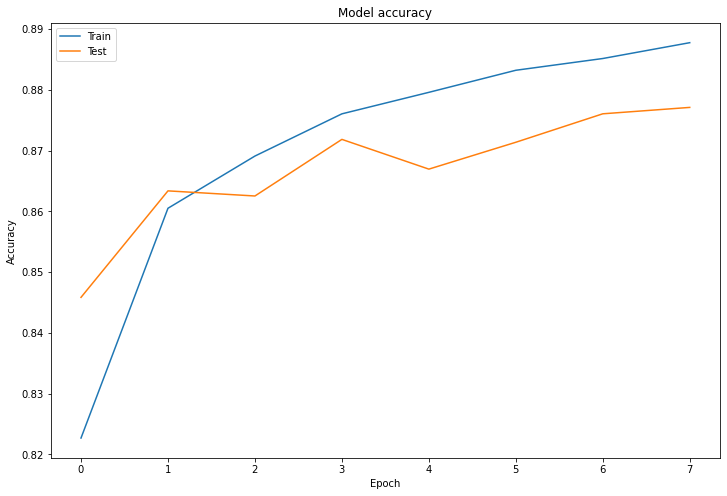

In [ ]:
#Testing the best trained model with only male test data
X_train, X_test, y_train, y_test,len_vocab,max_len = preprocessing(df_test)
model_rnn(X_train, X_test, y_train, y_test,len_vocab,max_len)

In [ ]:
max_len,vocab,x_f,y_f,char_indices,names,names_sequence = language_model(df_F)

C:\Users\akhil\AppData\Local\Temp/ipykernel_38332/444246077.py:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((len(names_sequence), max_len, len(vocab)), dtype=np.bool)
C:\Users\akhil\AppData\Local\Temp/ipykernel_38332/444246077.py:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(names_sequence), len(vocab)), dtyp

In [ ]:
#Building a model and predecting 100 female names
import keras.backend as K
model = Sequential()
model.add(GRU(64, input_shape=(max_len, len(vocab))))
model.add(Dense(len(vocab), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01))
names_one =[]

history = model.fit(x_f, y_f, batch_size=128, epochs=10, verbose=1, callbacks=[callback])


Epoch 1/10
634/638 [============================>.] - ETA: 0s - loss: 2.0382Names
amona
johna
opryda
uttine
onetta
naieima
rna ane
renlee
halina
hannitha
words in data set before
set()
Rate of total invented words: 1.00
638/638 [==============================] - 10s 14ms/step - loss: 2.0373
Epoch 2/10
635/638 [============================>.] - ETA: 0s - loss: 1.8797Names
yekdali
yajouna
xoy
risabeth
aquani
anacer
shaeni
faileng
alina
arany
words in data set before
set()
Rate of total invented words: 1.00
638/638 [==============================] - 11s 17ms/step - loss: 1.8795
Epoch 3/10
638/638 [==============================] - ETA: 0s - loss: 1.8321Names
xelanna
fretteene
racquan
winnet
danevie
llouse
eaderina
entabel
denthie
orrah
words in data set before
set()
Rate of total invented words: 1.00
638/638 [==============================] - 10s 16ms/step - loss: 1.8321
Epoch 4/10
634/638 [============================>.] - ETA: 0s - loss: 1.8019Names
kaeyah
uliana
ya iaha
aylan
fiss eigh

In [ ]:
#Predicting 100 female names
names_one


['amona',
 'johna',
 'opryda',
 'uttine',
 'onetta',
 'naieima',
 'rna ane',
 'renlee',
 'halina',
 'hannitha',
 'yekdali',
 'yajouna',
 'xoy',
 'risabeth',
 'aquani',
 'anacer',
 'shaeni',
 'faileng',
 'alina',
 'arany',
 'xelanna',
 'fretteene',
 'racquan',
 'winnet',
 'danevie',
 'llouse',
 'eaderina',
 'entabel',
 'denthie',
 'orrah',
 'kaeyah',
 'uliana',
 'ya iaha',
 'aylan',
 'fiss eigh',
 'effaba',
 'grinelo',
 'oliera',
 'taisja',
 'gyonge',
 'oyalena',
 '',
 'ferri',
 're ie',
 'beydie',
 'foaktah',
 'owinge',
 ' risah',
 'onnasha',
 'malaie',
 'oleen',
 'ma imiah',
 'oretha',
 'sannie',
 'uxa',
 'velatu',
 'mely',
 'reid',
 'alorra',
 'rynel',
 'la ita',
 'parki',
 'ireeu',
 'ivise',
 'fana',
 'urada',
 'alussida',
 'ilyse',
 'jovedan',
 'sadeia',
 'arien',
 'elaimi',
 'urline',
 'audaya',
 ' arianne',
 'ura',
 'prystely',
 'alyssa',
 'lilatie',
 'vanthrin',
 'kyjia',
 'joinine',
 'uwunda',
 ' harionne',
 'asslyn',
 'lleaan',
 'geagg',
 'quamissi',
 'wiramaree',
 'uldesearr'

In [ ]:
gender_f = []
for i in range(len(names_one)):
    gender_f.append('F')
df_dic_1 = {'name':names_one,'gender':gender_f}
df_test_1 = pd.DataFrame(df_dic_1)


Epoch 1/8
2376/2376 [==============================] - 38s 16ms/step - loss: 0.4088 - accuracy: 0.8215 - val_loss: 0.3495 - val_accuracy: 0.8540
Epoch 2/8
2376/2376 [==============================] - 11s 4ms/step - loss: 0.3511 - accuracy: 0.8571 - val_loss: 0.3377 - val_accuracy: 0.8612
Epoch 3/8
2376/2376 [==============================] - 12s 5ms/step - loss: 0.3319 - accuracy: 0.8665 - val_loss: 0.3440 - val_accuracy: 0.8587
Epoch 4/8
2376/2376 [==============================] - 11s 5ms/step - loss: 0.3205 - accuracy: 0.8721 - val_loss: 0.3127 - val_accuracy: 0.8738
Epoch 5/8
2376/2376 [==============================] - 11s 5ms/step - loss: 0.3115 - accuracy: 0.8769 - val_loss: 0.3116 - val_accuracy: 0.8745
Epoch 6/8
2376/2376 [==============================] - 12s 5ms/step - loss: 0.3038 - accuracy: 0.8810 - val_loss: 0.3128 - val_accuracy: 0.8750
Epoch 7/8
2376/2376 [==============================] - 12s 5ms/step - loss: 0.2981 - accuracy: 0.8846 - val_loss: 0.2996 - val_accuracy

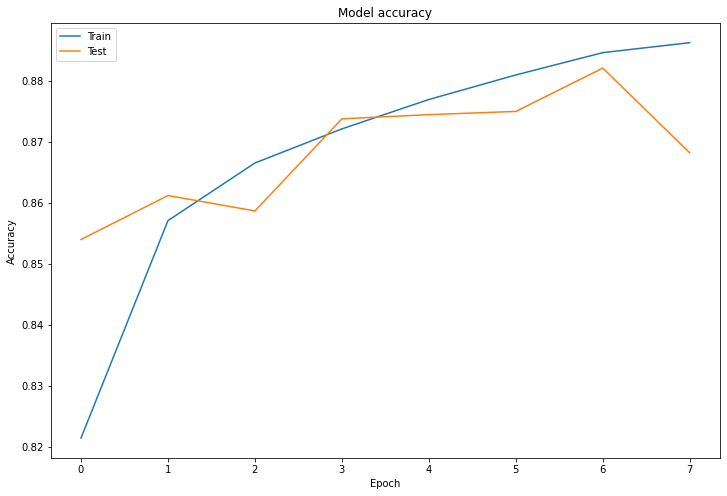

In [ ]:
#Testing the best trained model with only female names
X_train, X_test, y_train, y_test,len_vocab,max_len = preprocessing(df_test_1)
model_rnn(X_train, X_test, y_train, y_test,len_vocab,max_len)

In [ ]:
#filtering the given data according to the given condtion
names_a_w = list(df['name'])
names_a_w
letters = ['A','M','Z']
result = [name for name in names_a_w if(name[0] in letters)]


In [ ]:
#creating a data frame with names only starting with A, M, Z
df_a = pd.DataFrame(result, columns=['name'])
max_len,vocab,x_a,y_a,char_indices,names,names_sequence = language_model(df_a)


C:\Users\akhil\AppData\Local\Temp/ipykernel_38332/1472367746.py:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((len(names_sequence), max_len, len(vocab)), dtype=np.bool)
C:\Users\akhil\AppData\Local\Temp/ipykernel_38332/1472367746.py:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(names_sequence), len(vocab)), dt

In [ ]:
model = Sequential()
#adding an LSTM module
model.add(LSTM(64, input_shape=(max_len, len(vocab))))
#using softmax activation function
model.add(Dense(len(vocab), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01))
history = model.fit(x_a, y_a, batch_size=128, epochs=10, verbose=1, callbacks=[callback])

Epoch 1/10
976/979 [============================>.] - ETA: 0s - loss: 2.1045Names
dustea
cala
alesha
oisanna
 omarlan
iyenn
rayde
aussr
oumry
shaiabh
words in data set before
{'alesha'}
Rate of total invented words: 0.90
979/979 [==============================] - 16s 14ms/step - loss: 2.1043
Epoch 2/10
979/979 [==============================] - ETA: 0s - loss: 1.9379Names
euthoiine
mai y
cavel
mczarren
iahmande
megadul
ufun
iven
brrrmos
pullrous
words in data set before
set()
Rate of total invented words: 1.00
979/979 [==============================] - 15s 15ms/step - loss: 1.9379
Epoch 3/10
977/979 [============================>.] - ETA: 0s - loss: 1.8888Names
ubmuntaba
oloz
daldonn
rados
canthon
piein
egan
belyn
anepto
aemaii
words in data set before
set()
Rate of total invented words: 1.00
979/979 [==============================] - 14s 14ms/step - loss: 1.8887
Epoch 4/10
977/979 [============================>.] - ETA: 0s - loss: 1.8593Names
zyiah
ailan
drrrreda
lja
xrray
prle
qurre


In [ ]:
# Combining all the generated names into a single corpus
corpus = list(set(list(df_a['name'])))

In [ ]:
# Printing 50 names that start with A, M, Z
import random
for i in range(50):
    random_name = random.choice(corpus)
    print(random_name)

Zaina
Ardriana
Ambrosio
Zaedon
Meguel
Airin
Avanti
Mauda
Abimelec
Madilene
Mckylee
Aristide
Mackinzey
Abdou
Megale
Ailyah
Zehra
Manee
Zekai
Alexandrea
Maralee
Aniyyah
Allianah
Abdurahmon
Moisses
Marzetta
Alexxia
Arliana
Argelio
Ashiah
Aideth
Zevan
Marcellia
Michiel
Zenya
Annalize
Marial
Ashlinn
Marqueta
Machella
Adraine
Ariene
Makyi
Ammer
Adebowale
Abida
Zaniel
Maric
Allishia
Aldrina


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Define a function to calculate the perplexity of a generated name
def calculate_perplexity(name, model, char_indices, vocab):
    # Convert the name to a sequence of indices
    indices = [char_indices.get(c, 0) for c in name]  # use get method to handle missing characters
    # Pad the sequence with zeros to match the maximum length
    padded_indices = pad_sequences([indices], maxlen=max_len, value=0)
    # Convert the padded sequence to a one-hot encoding
    x = np.zeros((1, max_len, len(vocab)))
    for t, index in enumerate(padded_indices[0]):
        x[0, t, index] = 1.
    preds = model.predict(x, verbose=1)[0]
    perplexity = np.exp(-np.sum(np.log2(preds[indices[i]]) for i in range(len(indices))) / len(indices))

    return perplexity

In [ ]:
# Calculate the perplexity of each generated name
perplexities = []
for name in corpus:
    perplexity = calculate_perplexity(name, model, char_indices, vocab)
    perplexities.append((name, perplexity))

# Sort the names by perplexity in increasing order
perplexities = sorted(perplexities, key=lambda x: x[1])

# Print out the names along with their perplexities
for name, perplexity in perplexities:
    print(f"{name}: {perplexity}")


C:\Users\akhil\AppData\Local\Temp/ipykernel_38332/1501001962.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  perplexity = np.exp(-np.sum(np.log2(preds[indices[i]]) for i in range(len(indices))) / len(indices))


Arisbet: 226.39746842402593
Mychell: 232.86076021202288
Mihit: 240.95040560487655
Adael: 243.15852996712135
Mehmet: 245.6367644326245
Myshell: 254.91739958127042
Aidenn: 255.85185342393308
Monseratt: 308.0324267388553
Aydden: 315.35274954330174
Mehmed: 324.97865865306125
Markest: 325.0245896541196
Mandell: 341.8167712616625
Zadin: 342.9514794443556
Aadin: 342.9514794443556
Artist: 367.1711319094052
Maxwell: 370.90437116745665
Maddan: 378.570140394441
Maudell: 382.37492107714604
Messai: 386.06689576338374
Asusena: 386.5373068104084
Adiel: 387.6145748953311
Messi: 407.2494716212421
Moneer: 409.93721181976065
Agustus: 412.577633849321
Aristides: 416.6823503095097
Arismel: 423.5763636501878
Maxwill: 444.7711716482229
Aristedes: 451.7852798345842
Mesai: 468.47162153349416
Angeleen: 470.1907477882804
Arsene: 470.1925414270614
Ahkil: 471.2885607695063
Araseli: 471.92696155702083
Auset: 510.91054451849055
Arasele: 510.96821289484626
Moses: 517.5588258573373
Michaell: 524.2337527367807
Michelle